In [1]:
# 1) ensure Python can see your project root
import os, sys, time
import numpy as np
import matplotlib.pyplot as plt

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("→ Added to sys.path:", project_root)
print("→ cwd is:", os.getcwd())

from environments.simple_env    import simpleAUVEnv
from agents.auv_dqn_agent      import SimpleAuvDQNAgent
from utils.rl_utils            import *

→ Added to sys.path: /Users/eirikvarnes/code/auv-rl-project
→ cwd is: /Users/eirikvarnes/code/auv-rl-project/notebooks
pygame 2.6.1 (SDL 2.28.4, Python 3.11.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# 1) Make the env
env = simpleAUVEnv(
    grid_size=(200,200),
    resolution=0.1,
    docks=1,
    dock_radius=0.3,
    dock_reward=20.0,
    n_beams=12,
    start_mode='random',
    discrete_actions=True,
    use_history=True,
    history_length=6,
    random_map= True,
    map_fill_prob = 0.35,   # probability of a cell being filled with an obstacle
    smooth_steps = 8,      # number of smoothing steps to apply to the map
    birth_limit = 4,       # number of cells that need to be filled for a cell to be born
    death_limit = 4,       # number of cells that need to be empty for a cell to die
)

# 2) Create agent
agent = SimpleAuvDQNAgent(env,
                          hidden_dims=[64,64],
                          lr=1e-3,
                          gamma=0.95,
                          epsilon_start=1.0,
                          epsilon_min=0.01,
                          epsilon_decay=0.9965,
                          batch_size=64,
                          buffer_size=5000,
                          target_update=20)


DQN Training: 100%|██████████| 1000/1000 [01:42<00:00,  9.74it/s, Rew=8.54, ε=0.030]   


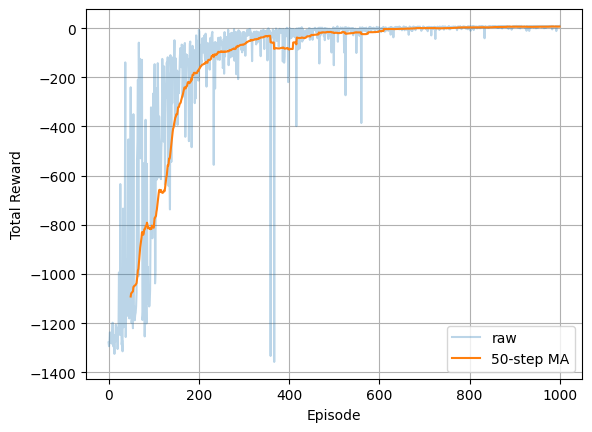

In [3]:
# 3) Train
rewards = train_dqn(env, agent, episodes=1000, max_steps=500)
plot_rewards(rewards, window=50)
agent.save("../models/random_auv_dqn.pth")

In [4]:
# record_pygame_robust(env, agent, out_path='auv.avi')
# or
record_headless(env, agent, out_path='random_auv.gif')

Headless recording saved to random_auv.gif


In [5]:
# 4) Evaluate
# Load the trained agent
agent.load("../models/random_auv_dqn.pth")

In [6]:
# Evaluate the agent
sr, avg_steps = evaluate_agent(env, agent, episodes=1000, max_steps=500)
print(f"Success rate: {sr*100:.1f}%, Avg steps: {avg_steps:.1f}")

Success rate: 100.0%, Avg steps: 27.0
